Um projétil é disparado para cima com uma inclinação (ângulo de inclinação ϕ
) com velocidade inicial vi
 em um ângulo θ
 em relação à horizontal (θ>ϕ
), como mostrado na Figura.

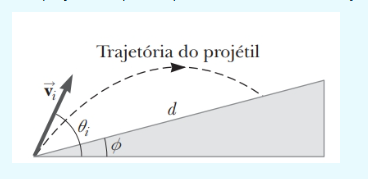

a) Escreva um programa que mostre as posições x e y do projétil em função do tempo

b) Modifique seu programa para calcular simulataneamente a posição x e y do projétil e a altura y do plano (relativo ao x do projétil) em função do tempo

c) Modifique seu programa da letra b) para comparar as alturas e encontrar o tempo que há a colisão entre o projétil e o plano. Qual o valor do tempo?

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

a) Escreva um programa que mostre as posições x e y do projétil em função do tempo

Tempo (t): [0.   0.01]
Posição x: [0.         0.01998782]
Posição y: [0.         0.00020799]


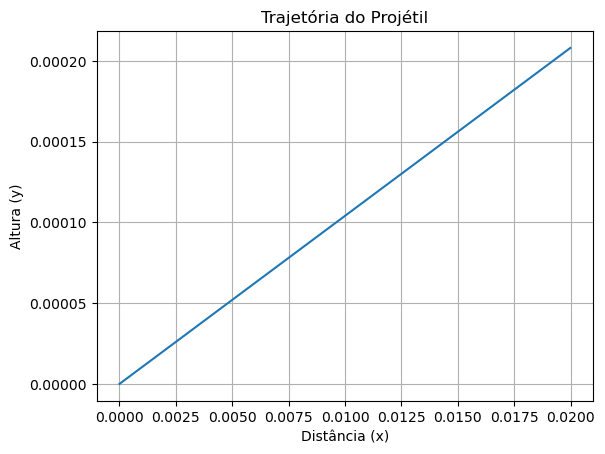

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#função que calcula a trajetória do projétil
def traj_projetil(v0=None, theta=None, phi=None, g=9.8, dt=0.01):
    if v0 is None:
        v0 = int(input('Insira seu v0: '))
    if theta is None:
        theta = int(input('Insira seu theta: '))
    if phi is None:
        phi = int(input('Insira seu phi: '))


   #calculamos os angulos em radianos
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)

    #calculos as componentes do vetor velocidade
    v0x = v0 * np.cos(theta_rad)
    v0y =v0 * np.sin(phi_rad)

    #tempo que o projetil leva para atingir o chão (tempo maximo)
    t_max = 2 * v0y / g

    #armazenando dados como arrays
    t = np.arange(0, t_max, dt)
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2

    #removemos valores negativos 
    mask = y >= 0
    t = t[mask]
    x = x[mask]
    y = y[mask]

    return t, x, y

#v0 = int(input('Insira seu v0: '))
#theta = int(input('Insira seu theta: '))
#phi = int(input('Insira seu phi: '))

t, x, y = traj_projetil()
print("Tempo (t):", t)
print("Posição x:", x)
print("Posição y:", y)

# Plotando a trajetoria
plt.plot(x, y)
plt.xlabel('Distância (x)')
plt.ylabel('Altura (y)')
plt.title('Trajetória do Projétil')
plt.grid()
plt.show()
    

a) 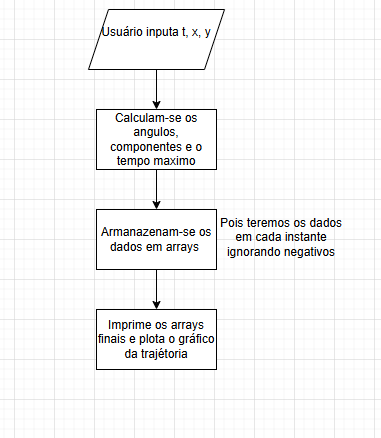

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

b) Modifique seu programa para calcular simulataneamente a posição x e y do projétil e a altura y do plano (relativo ao x do projétil) em função do tempo


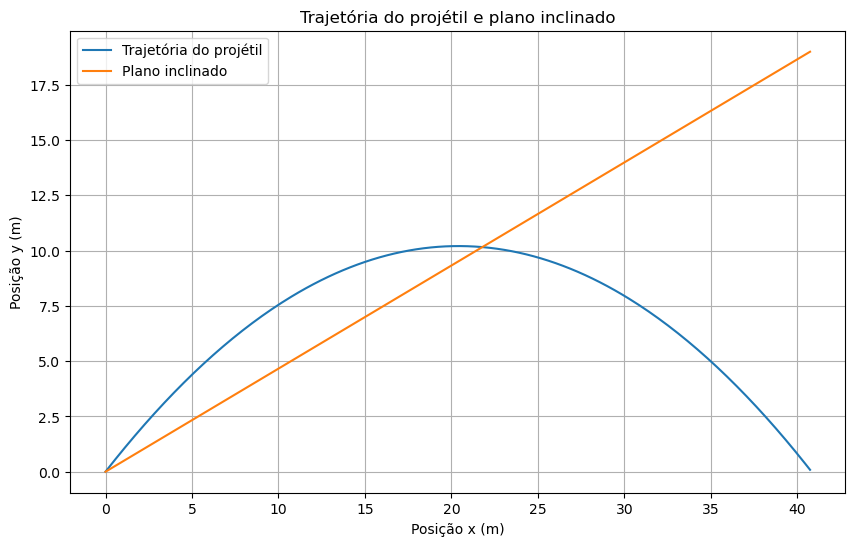

In [36]:
def trajetoria_com_plano(v0, theta, phi, g=9.8, dt=0.01):
    
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)
    
    # Componentes da velocidade inicial
    v0x = v0 * np.cos(theta_rad)
    v0y = v0 * np.sin(theta_rad)
    
    # Tempo até o projétil atingir o solo 
    t_max = 2 * v0y / g
    
    # Arrays para armazenar resultados
    t = np.arange(0, t_max, dt)
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2
    
    # Altura do plano inclinado em cada posição x
    y_plano = np.tan(phi_rad) * x
    
    # Remove valores negativos de y 
    mask = y >= 0
    t = t[mask]
    x = x[mask]
    y = y[mask]
    y_plano = y_plano[mask]
    
    return t, x, y, y_plano

v0 = 20
theta = 45
phi = 25

t, x, y, y_plano = trajetoria_com_plano(v0, theta, phi)

# Plot da trajetória e do plano
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Trajetória do projétil')
plt.plot(x, y_plano, label='Plano inclinado')
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Trajetória do projétil e plano inclinado')
plt.grid(True)
plt.legend()
plt.show()

c) Modifique seu programa da letra b) para comparar as alturas e encontrar o tempo que há a colisão entre o projétil e o plano. Qual o valor do tempo?

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def trajetoria_com_plano(v0, theta, phi, g=9.8, dt=0.01):
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)
    
    v0x = v0 * np.cos(theta_rad)
    v0y = v0 * np.sin(theta_rad)
    
    t_max = 2 * v0y / g
    t = np.arange(0, t_max, dt)
    
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2
    y_plano = np.tan(phi_rad) * x
    
    colisao_mask = y <= y_plano
    if np.any(colisao_mask):
        colisao_idx = np.argmax(colisao_mask)
        t_colisao = t[colisao_idx]
        x_colisao = x[colisao_idx]
        y_colisao = y[colisao_idx]
    else:
        t_colisao = None
        x_colisao = x[-1]
        y_colisao = y[-1]
    
    # Verificação de erro físico
    if t_colisao is not None and t_colisao <= 0:
        raise ValueError("Tempo de colisão inválido. Ajuste os parâmetros (phi ou v0).")
    
    mask = (t <= t_colisao) if t_colisao is not None else (y >= 0)
    t = t[mask]
    x = x[mask]
    y = y[mask]
    y_plano = y_plano[mask]
    
    return t, x, y, y_plano, t_colisao, x_colisao, y_colisao

# Parâmetros (exemplo que funciona)
v0 = 5
theta = 45
phi = 25
try:
    t, x, y, y_plano, t_colisao, x_colisao, y_colisao = trajetoria_com_plano(v0, theta, phi)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Trajetória do projétil')
    plt.plot(x, y_plano, label='Plano inclinado', linestyle='--')
    
    if t_colisao is not None:
        plt.scatter(x_colisao, y_colisao, color='red', label=f'Colisão em t = {t_colisao:.2f} s')
        print(f"Tempo de colisão: {t_colisao:.2f} s")
    else:
        plt.scatter(x_colisao, y_colisao, color='blue', label='Sem colisão')
        print("O projétil não atingiu o plano.")
    
    plt.xlabel('Posição x (m)')
    plt.ylabel('Posição y (m)')
    plt.title('Trajetória do projétil e plano inclinado')
    plt.grid(True)
    plt.legend()
    plt.show()

except ValueError as e:
    print(e)

Tempo de colisão inválido. Ajuste os parâmetros (phi ou v0).
